In [1]:
!pip install qiskit 
!pip install qiskit-experiments
!pip install qiskit-ignis
!pip install matplotlib==3.1.3
!pip install pylatexenc
from IPython.display import clear_output
clear_output(wait=False)

In [2]:
from qiskit import *
from qiskit.providers.fake_provider import FakeParis
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_state_city
import qiskit.quantum_info as qi
from qiskit_experiments.library import StateTomography
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

# For simulation
from qiskit.providers.aer import AerSimulator
from qiskit.providers.fake_provider import FakeParis

# Noisy simulator backend
backend = AerSimulator.from_backend(FakeParis())

<ipython-input-2-6d9591e05700>:8: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


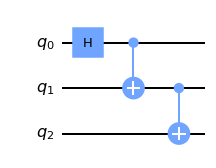

In [3]:
qc = QuantumCircuit(3)
'''Easieast Way I could think of ''' 
# qc.h(0)
# qc.cx([0,1], [1,2])

''' Method in paper ''' 
theta = np.pi/2
qc = QuantumCircuit(3)
qc.ry(theta, [0,1,2])
qc.cp(np.pi, [0,1], [1,2])
qc.ry(theta, [0,2])
qc.x(1)

qc.draw(output='mpl')





In [4]:
qstexp1 = StateTomography(qc)
qstdata1 = qstexp1.run(backend, seed_simulation=100).block_for_results()
state_result = qstdata1.analysis_results("state")

# Print results
for result in qstdata1.analysis_results():
    print(result)

AnalysisResult
- name: state
- value: DensityMatrix([[ 4.71924944e-01+0.00000000e+00j,
                -5.28100535e-03-6.24276429e-03j,
                -1.44709257e-03-5.21571504e-03j,
                -1.55751632e-03+5.04939688e-03j,
                 2.18374705e-03-4.46085971e-03j,
                -6.95110635e-03-6.47505607e-03j,
                 1.17473161e-02-1.57740606e-03j,
                 4.19804990e-01-1.48030153e-03j],
               [-5.28100535e-03+6.24276429e-03j,
                 2.03678258e-02+2.58524274e-19j,
                 3.03140445e-03+7.92665598e-04j,
                -1.92972601e-04+3.01028910e-03j,
                 1.70910124e-03-1.02672674e-02j,
                 3.09141062e-03+4.24254918e-03j,
                 2.18593023e-03-3.13000088e-03j,
                -4.86311254e-03-3.22880441e-03j],
               [-1.44709257e-03+5.21571504e-03j,
                 3.03140445e-03-7.92665598e-04j,
                 1.05286075e-02+6.14566763e-20j,
                 3.57420397e-

In [5]:
state_result = qstdata1.analysis_results("state")
print(state_result.value)

DensityMatrix([[ 4.71924944e-01+0.00000000e+00j,
                -5.28100535e-03-6.24276429e-03j,
                -1.44709257e-03-5.21571504e-03j,
                -1.55751632e-03+5.04939688e-03j,
                 2.18374705e-03-4.46085971e-03j,
                -6.95110635e-03-6.47505607e-03j,
                 1.17473161e-02-1.57740606e-03j,
                 4.19804990e-01-1.48030153e-03j],
               [-5.28100535e-03+6.24276429e-03j,
                 2.03678258e-02+2.58524274e-19j,
                 3.03140445e-03+7.92665598e-04j,
                -1.92972601e-04+3.01028910e-03j,
                 1.70910124e-03-1.02672674e-02j,
                 3.09141062e-03+4.24254918e-03j,
                 2.18593023e-03-3.13000088e-03j,
                -4.86311254e-03-3.22880441e-03j],
               [-1.44709257e-03+5.21571504e-03j,
                 3.03140445e-03-7.92665598e-04j,
                 1.05286075e-02+6.14566763e-20j,
                 3.57420397e-03+3.27621385e-03j,
                -7

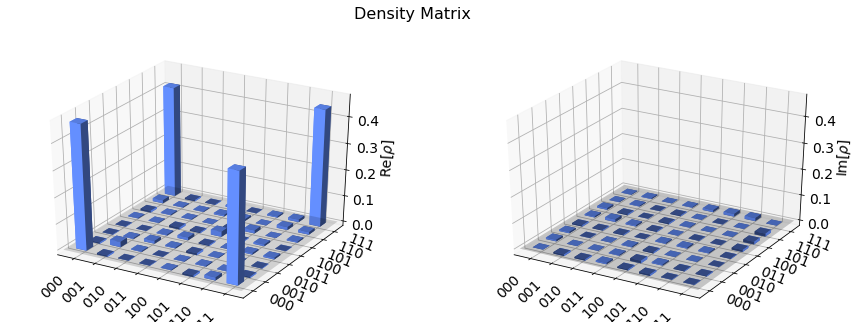

In [6]:
plot_state_city(state_result.value, title='Density Matrix')